# Differential accessibility for E vs V snATAC-seq
- https://stuartlab.org/signac/articles/mouse_brain_vignette

## Set up correct conda environment


In [ ]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

## Load packages

In [41]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

library(chromVAR)
library(JASPAR2020)
library(TFBSTools)
library(patchwork)
library(cowplot)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.2.0                    TFBSTools_1.38.0                  
 [3] JASPAR2020_0.99.10                 chromVAR_1.24.0                   
 [5] ggExtra_0.10.1                     gg

## STEP 0: Paths

In [4]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC"

In [5]:
# E+V merged object (no cell type labels)
E_V.atac.obj.path <- paste0(data_master_dir, '/xjluo_analysis', '/step2_merge', '/E_V', '/E2_V_merged.annotated.rds')

E_V.atac.obj.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step2_merge/E_V/E2_V_merged.annotated.rds"

In [6]:
rna_path <- paste0(data_master_dir, '/', 'RNA', '/', 'ctx.Robj')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA/ctx.Robj"

In [7]:
# save output (labeled) object in this folder
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step2_merge"

## STEP 1: Load objects

In [8]:
E_V.merged.atac.obj <- readRDS(E_V.atac.obj.path)

In [9]:
load(rna_path)

# NOTE: the 'v4' in variable names is just for convenience, since this notebook is adapted from a previous ATAC dataset.
# Seurat v5 is now used.

rna.obj <- ctx


In [10]:
E_V.merged.atac.obj

An object of class Seurat 
340622 features across 4919 samples within 2 assays 
Active assay: ACTIVITY (1528 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

In [11]:
colnames(E_V.merged.atac.obj@meta.data)

[1] "orig.ident"                         "nCount_ATAC"                       
 [3] "nFeature_ATAC"                      "nucleosome_signal"                 
 [5] "nucleosome_percentile"              "TSS.enrichment"                    
 [7] "TSS.percentile"                     "ATAC_snn_res.1.2"                  
 [9] "seurat_clusters"                    "dataset"                           
[11] "nCount_ACTIVITY"                    "nFeature_ACTIVITY"                 
[13] "predicted.id"                       "prediction.score.IN.Lamp5.Lhx6"    
[15] "prediction.score.L2.3.5.IT"         "prediction.score.Astro_Aqp4"       
[17] "prediction.score.Astro_Top2a"       "prediction.score.L6.IT_2"          
[19] "prediction.score.Migrating.neurons" "prediction.score.L6.CT_Cpa6"       
[21] "prediction.score.OPC_Pdgfra"        "prediction.score.L6.IT_1"          
[23] "prediction.score.max"

In [12]:
rna.obj

An object of class Seurat 
32475 features across 7158 samples within 6 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 5 other assays present: ADT, prediction.score.class, prediction.score.cluster, prediction.score.subclass, prediction.score.cross_species_cluster
 5 dimensional reductions calculated: integrated_dr, ref.umap, pca, umap.unintegrated, umap

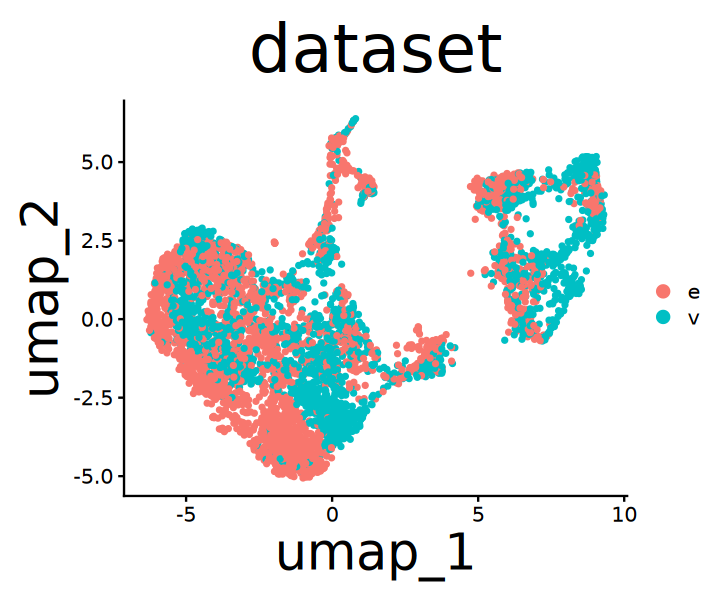

In [13]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

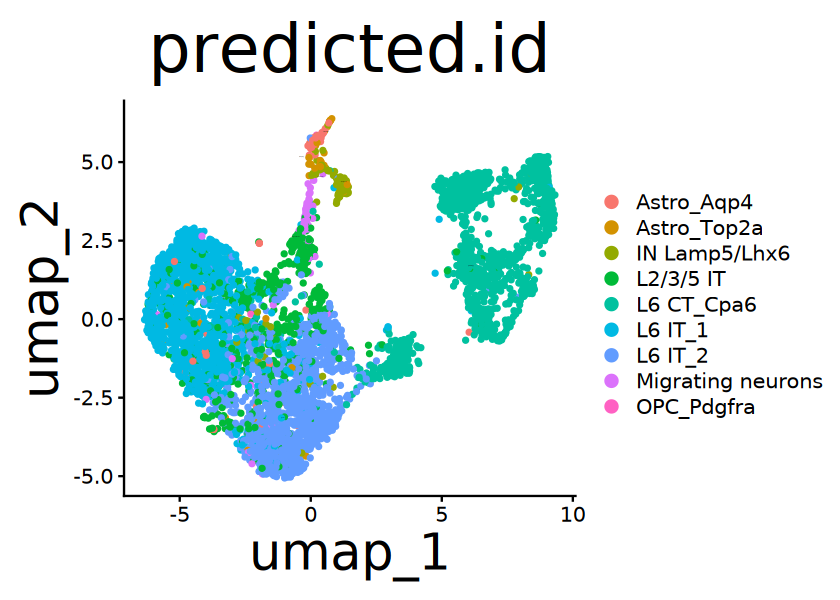

In [14]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

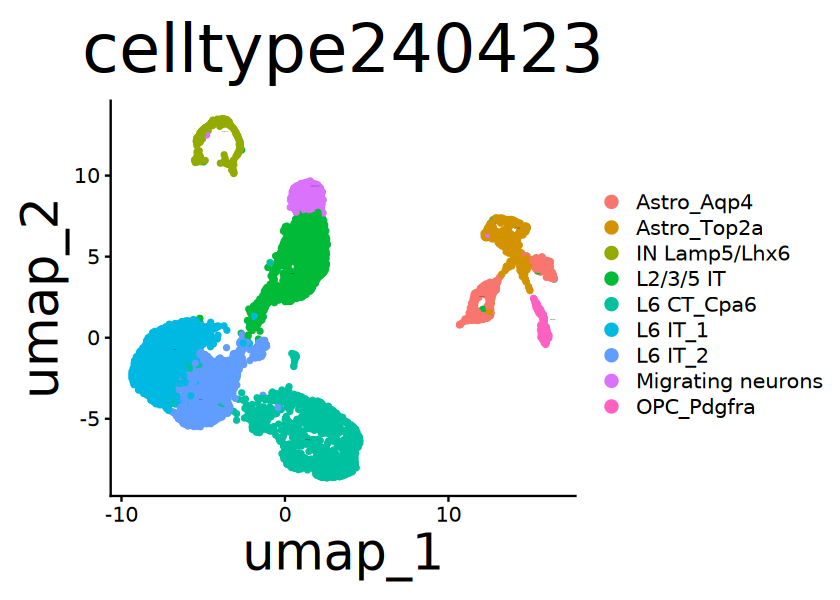

In [15]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(rna.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'celltype240423', reduction = 'umap', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

## STEP 2: chromVAR

In [16]:
# Get a list of motif position frequency matrices from the JASPAR database
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

In [17]:
# add motif information
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'

E_V.merged.atac.obj <- AddMotifs(
  object = E_V.merged.atac.obj,
  genome = BSgenome.Mmusculus.UCSC.mm10,
  pfm = pfm
)

Building motif matrix

Finding motif positions

Creating Motif object



In [18]:
E_V.merged.atac.obj <- RunChromVAR(
  object = E_V.merged.atac.obj,
  genome = BSgenome.Mmusculus.UCSC.mm10
)

Computing GC bias per region

Selecting background regions

Computing deviations from background

Constructing chromVAR assay



In [53]:
E_V.merged.atac.obj

An object of class Seurat 
341368 features across 4919 samples within 3 assays 
Active assay: chromvar (746 features, 0 variable features)
 1 layer present: data
 2 other assays present: ATAC, ACTIVITY
 2 dimensional reductions calculated: lsi, umap

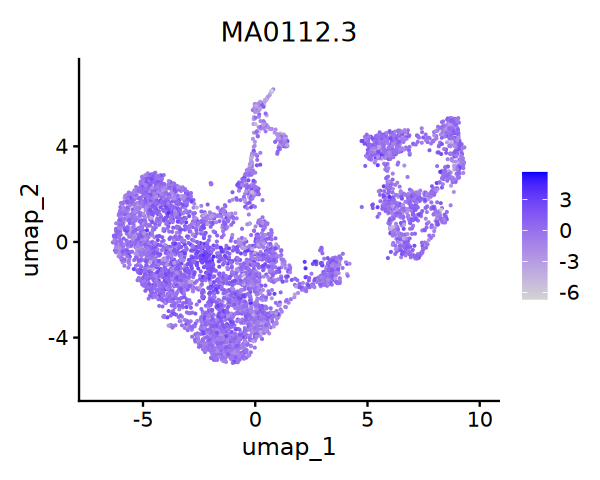

In [20]:
options(repr.plot.width=5, repr.plot.height=4)

DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

FeaturePlot(
  object = E_V.merged.atac.obj,
  features = "MA0112.3",
#   min.cutoff = 'q5',
#   max.cutoff = 'q95',
  pt.size = 0.1
)


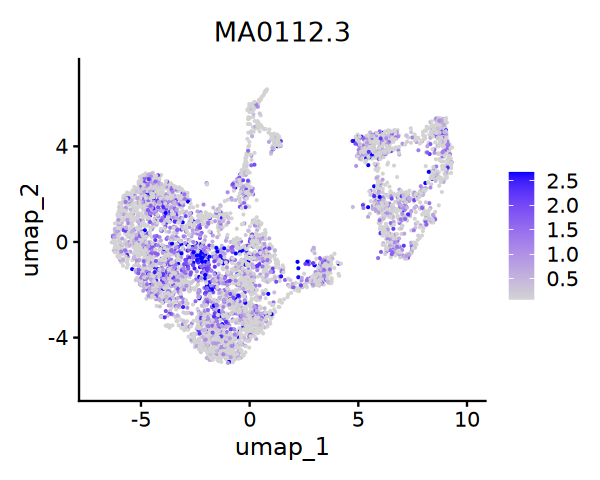

In [21]:
# Esr1

options(repr.plot.width=5, repr.plot.height=4)

DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

FeaturePlot(
  object = E_V.merged.atac.obj,
  features = "MA0112.3",
  min.cutoff = 'q5',
  max.cutoff = 'q95',
  pt.size = 0.1
)


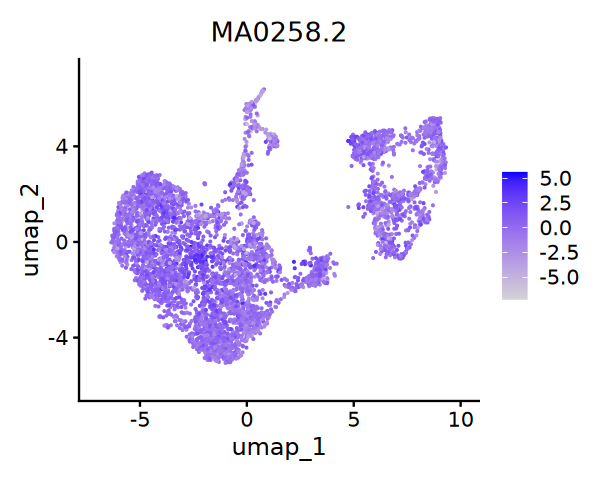

In [22]:
# Esr2

options(repr.plot.width=5, repr.plot.height=4)

DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

FeaturePlot(
  object = E_V.merged.atac.obj,
  features = "MA0258.2",
#   min.cutoff = 'q5',
#   max.cutoff = 'q95',
  pt.size = 0.1
)


In [23]:
Idents(E_V.merged.atac.obj) <- 'dataset'
head(Idents(E_V.merged.atac.obj))

E_AAACGAAAGCATTCCA-1 E_AAACGAACAACGACAG-1 E_AAACGAACACAGCTTA-1 
                   e                    e                    e 
E_AAACGAAGTACCTATG-1 E_AAACGAATCCGTGCAG-1 E_AAACGAATCGGAGTTT-1 
                   e                    e                    e 
Levels: e v

In [24]:
Idents(E_V.merged.atac.obj) <- 'dataset'
head(Idents(E_V.merged.atac.obj))

E_AAACGAAAGCATTCCA-1 E_AAACGAACAACGACAG-1 E_AAACGAACACAGCTTA-1 
                   e                    e                    e 
E_AAACGAAGTACCTATG-1 E_AAACGAATCCGTGCAG-1 E_AAACGAATCGGAGTTT-1 
                   e                    e                    e 
Levels: e v

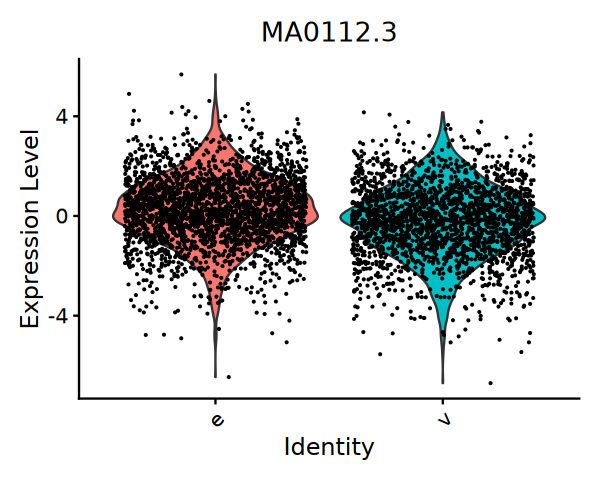

In [25]:
VlnPlot(
  object = E_V.merged.atac.obj,
  features = c('MA0112.3'),
  pt.size = 0.1
) + theme(legend.position="none")

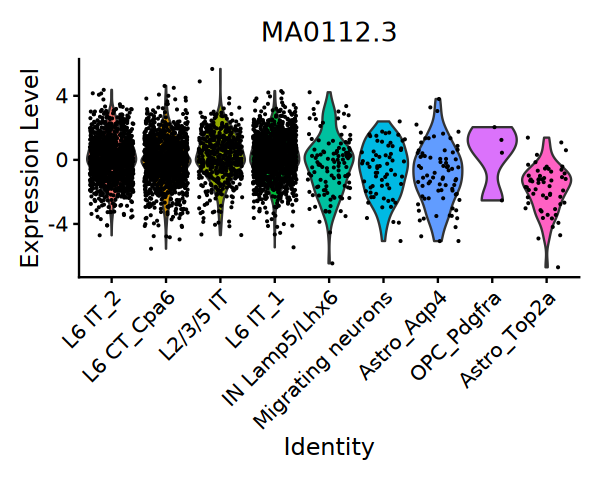

In [26]:
Idents(E_V.merged.atac.obj) <- 'predicted.id'

VlnPlot(
  object = E_V.merged.atac.obj,
  features = c('MA0112.3'),
  pt.size = 0.1
) + theme(legend.position="none")

In [28]:
Idents(E_V.merged.atac.obj) <- 'dataset'
differential.activity <- FindMarkers(
  object = E_V.merged.atac.obj,
  ident.1 = 'e',
  ident.2 = 'v',
  only.pos = TRUE,
  mean.fxn = rowMeans,
  fc.name = "avg_diff"
)

In [29]:
differential.activity

p_val         avg_diff  pct.1 pct.2 p_val_adj    
MA0139.1 2.432684e-171 1.0813807 0.697 0.341 1.814782e-168
MA1131.1  3.093621e-62 0.6001026 0.620 0.422  2.307841e-59
MA0656.1  6.097490e-59 0.5793856 0.617 0.427  4.548728e-56
MA0605.2  7.361504e-57 0.5638664 0.615 0.433  5.491682e-54
MA0840.1  2.074817e-55 0.5476254 0.605 0.425  1.547813e-52
MA1139.1  8.659601e-55 0.5413510 0.603 0.426  6.460062e-52
MA1145.1  2.291048e-54 0.5517746 0.600 0.426  1.709122e-51
MA0600.2  5.274653e-51 0.7449674 0.590 0.403  3.934891e-48
MA0799.1  5.822939e-50 0.7151956 0.584 0.407  4.343912e-47
MA1136.1  5.543056e-49 0.4981215 0.593 0.426  4.135120e-46
MA0834.1  3.709419e-48 0.4981752 0.592 0.427  2.767226e-45
MA1133.1  5.550234e-47 0.5025037 0.604 0.440  4.140475e-44
MA1127.1  1.406851e-46 0.4936002 0.607 0.434  1.049511e-43
MA1126.1  1.295773e-45 0.5091392 0.597 0.434  9.666467e-43
MA1140.2  9.806877e-45 0.4710371 0.588 0.429  7.315930e-42
MA1129.1  1.175564e-44 0.4792649 0.579 0.426  8.769708e-42
MA0798.2  6.290132e-43 0.5839782 0.586 0.411  4.692438e-40
MA0018.4  2.821925e-42 0.5408548 0.610 0.453  2.105156e-39
MA0510.2  1.454764e-41 0.6559175 0.578 0.424  1.085254e-38
MA1528.1  1.755956e-41 0.5747891 0.591 0.436  1.309943e-38
MA0258.2  3.325676e-38 0.5650224 0.593 0.435  2.480954e-35
MA1632.1  4.221157e-37 0.5036171 0.592 0.444  3.148983e-34
MA0609.2  1.941809e-36 0.4281118 0.589 0.434  1.448590e-33
MA1143.1  1.710912e-33 0.3895777 0.586 0.439  1.276340e-30
MA0488.1  8.115989e-33 0.4619887 0.587 0.441  6.054528e-30
⋮        ⋮             ⋮         ⋮     ⋮     ⋮            
MA0783.1 0.001828100   0.1448091 0.527 0.490 1            
MA0666.1 0.001978719   0.1011439 0.512 0.472 1            
MA0708.1 0.001978719   0.1011439 0.512 0.472 1            
MA0876.1 0.001978719   0.1011439 0.512 0.472 1            
MA0872.1 0.002469069   0.1142937 0.521 0.490 1            
MA0825.1 0.002983134   0.1213570 0.515 0.492 1            
MA0796.1 0.003369975   0.1189421 0.519 0.483 1            
MA0815.1 0.004103172   0.1036101 0.531 0.495 1            
MA0805.1 0.004861503   0.1116334 0.530 0.505 1            
MA0154.4 0.005494577   0.1160867 0.524 0.502 1            
MA1559.1 0.005979154   0.1406676 0.524 0.489 1            
MA0698.1 0.006016017   0.1571849 0.524 0.500 1            
MA1568.1 0.006386298   0.1064438 0.517 0.485 1            
MA0801.1 0.006765040   0.1117941 0.519 0.497 1            
MA0803.1 0.006765040   0.1117941 0.519 0.497 1            
MA1577.1 0.007160390   0.1012229 0.515 0.487 1            
MA0088.2 0.007856485   0.1178161 0.522 0.498 1            
MA0797.1 0.010507546   0.1161985 0.523 0.491 1            
MA0822.1 0.010652777   0.1049001 0.512 0.485 1            
MA0867.2 0.012057443   0.1126181 0.522 0.490 1            
MA0830.2 0.013269941   0.1324155 0.526 0.501 1            
MA0691.1 0.015472214   0.1102882 0.515 0.495 1            
MA0056.2 0.024825709   0.1127588 0.512 0.511 1            
MA0499.2 0.029129299   0.1050571 0.527 0.502 1            
MA1631.1 0.049468734   0.1121776 0.518 0.506 1

In [36]:
differential.activity['MA0112.3', ]

p_val        avg_diff  pct.1 pct.2 p_val_adj   
MA0112.3 2.587689e-29 0.4609185 0.58  0.446 1.930416e-26

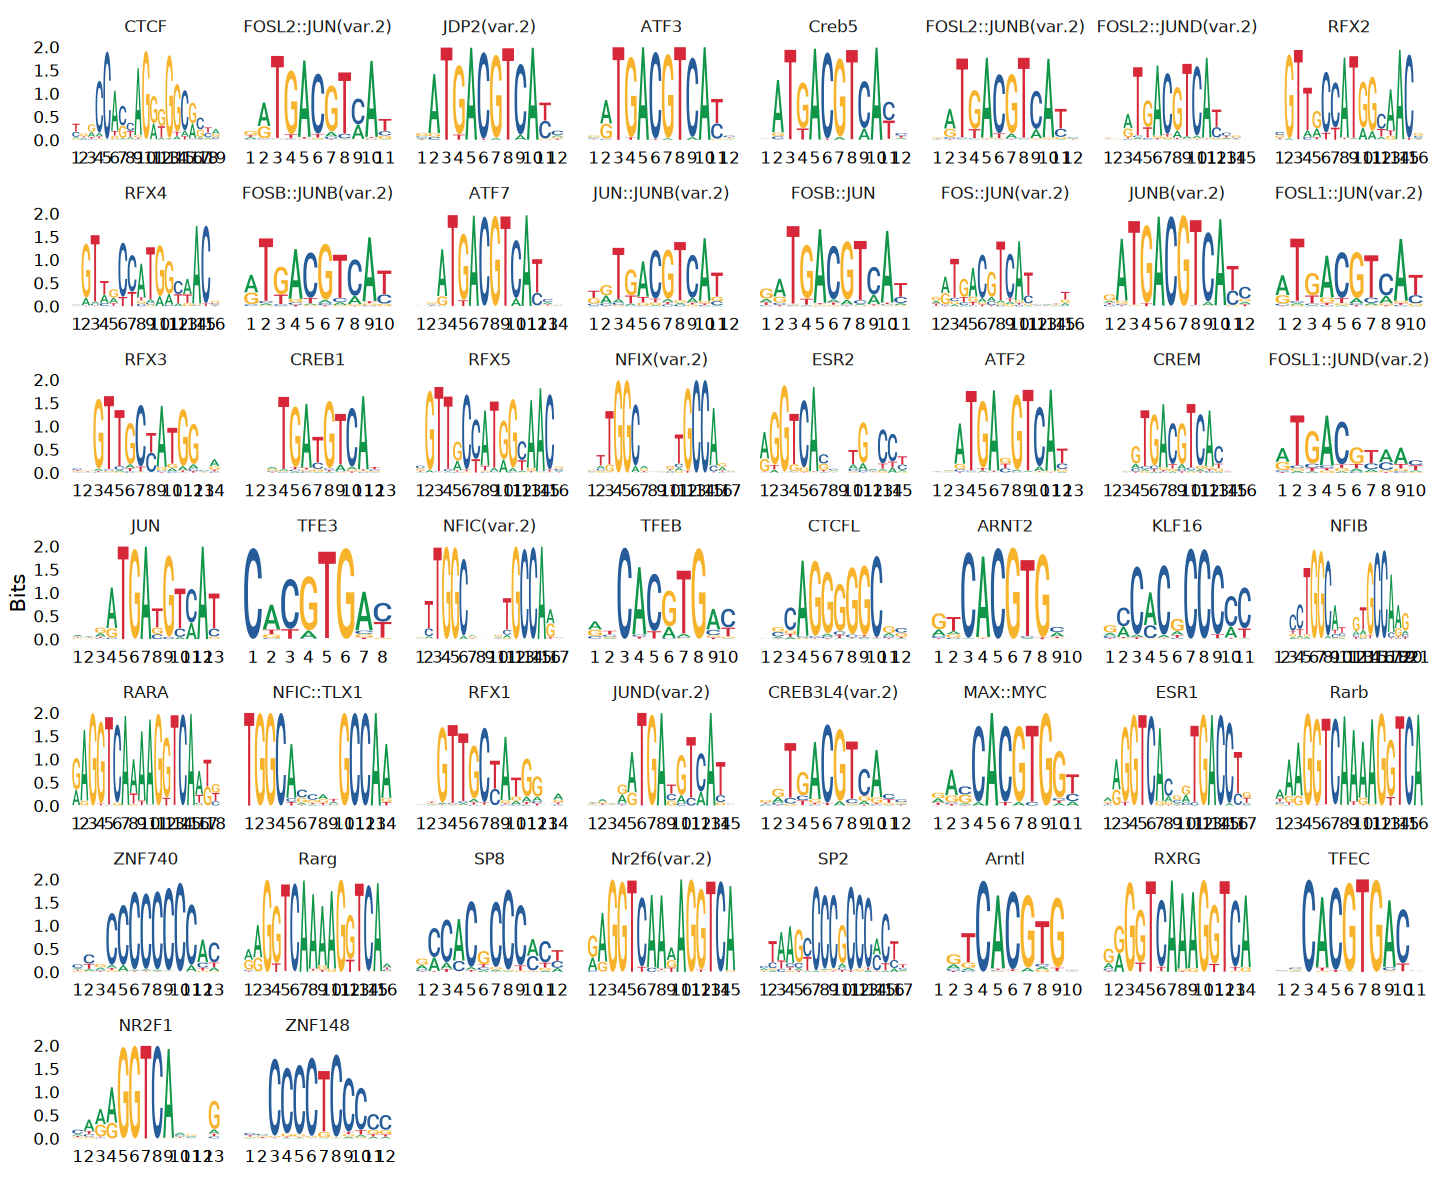

In [34]:
# Adjust plot settings to make it larger
options(repr.plot.width=12, repr.plot.height=10)

MotifPlot(
  object = E_V.merged.atac.obj,
  motifs = head(rownames(differential.activity), n=50),
  assay = 'ATAC'
)

In [37]:
head(rownames(differential.activity), n=3)

[1] "MA0139.1" "MA1131.1" "MA0656.1"

In [54]:
DefaultAssay(E_V.merged.atac.obj)

[1] "chromvar"

In [67]:
# Get the top 50 motifs
top_motifs <- head(rownames(differential.activity), n = 50)


In [76]:
ConvertMotifID(E_V.merged.atac.obj[['ATAC']], id = top_motifs)

[1] "CTCF"               "FOSL2::JUN(var.2)"  "JDP2(var.2)"       
 [4] "ATF3"               "Creb5"              "FOSL2::JUNB(var.2)"
 [7] "FOSL2::JUND(var.2)" "RFX2"               "RFX4"              
[10] "FOSB::JUNB(var.2)"  "ATF7"               "JUN::JUNB(var.2)"  
[13] "FOSB::JUN"          "FOS::JUN(var.2)"    "JUNB(var.2)"       
[16] "FOSL1::JUN(var.2)"  "RFX3"               "CREB1"             
[19] "RFX5"               "NFIX(var.2)"        "ESR2"              
[22] "ATF2"               "CREM"               "FOSL1::JUND(var.2)"
[25] "JUN"                "TFE3"               "NFIC(var.2)"       
[28] "TFEB"               "CTCFL"              "ARNT2"             
[31] "KLF16"              "NFIB"               "RARA"              
[34] "NFIC::TLX1"         "RFX1"               "JUND(var.2)"       
[37] "CREB3L4(var.2)"     "MAX::MYC"           "ESR1"              
[40] "Rarb"               "ZNF740"             "Rarg"              
[43] "SP8"                "Nr2f6(var.2)"       "SP2"               
[46] "Arntl"              "RXRG"               "TFEC"              
[49] "NR2F1"              "ZNF148"

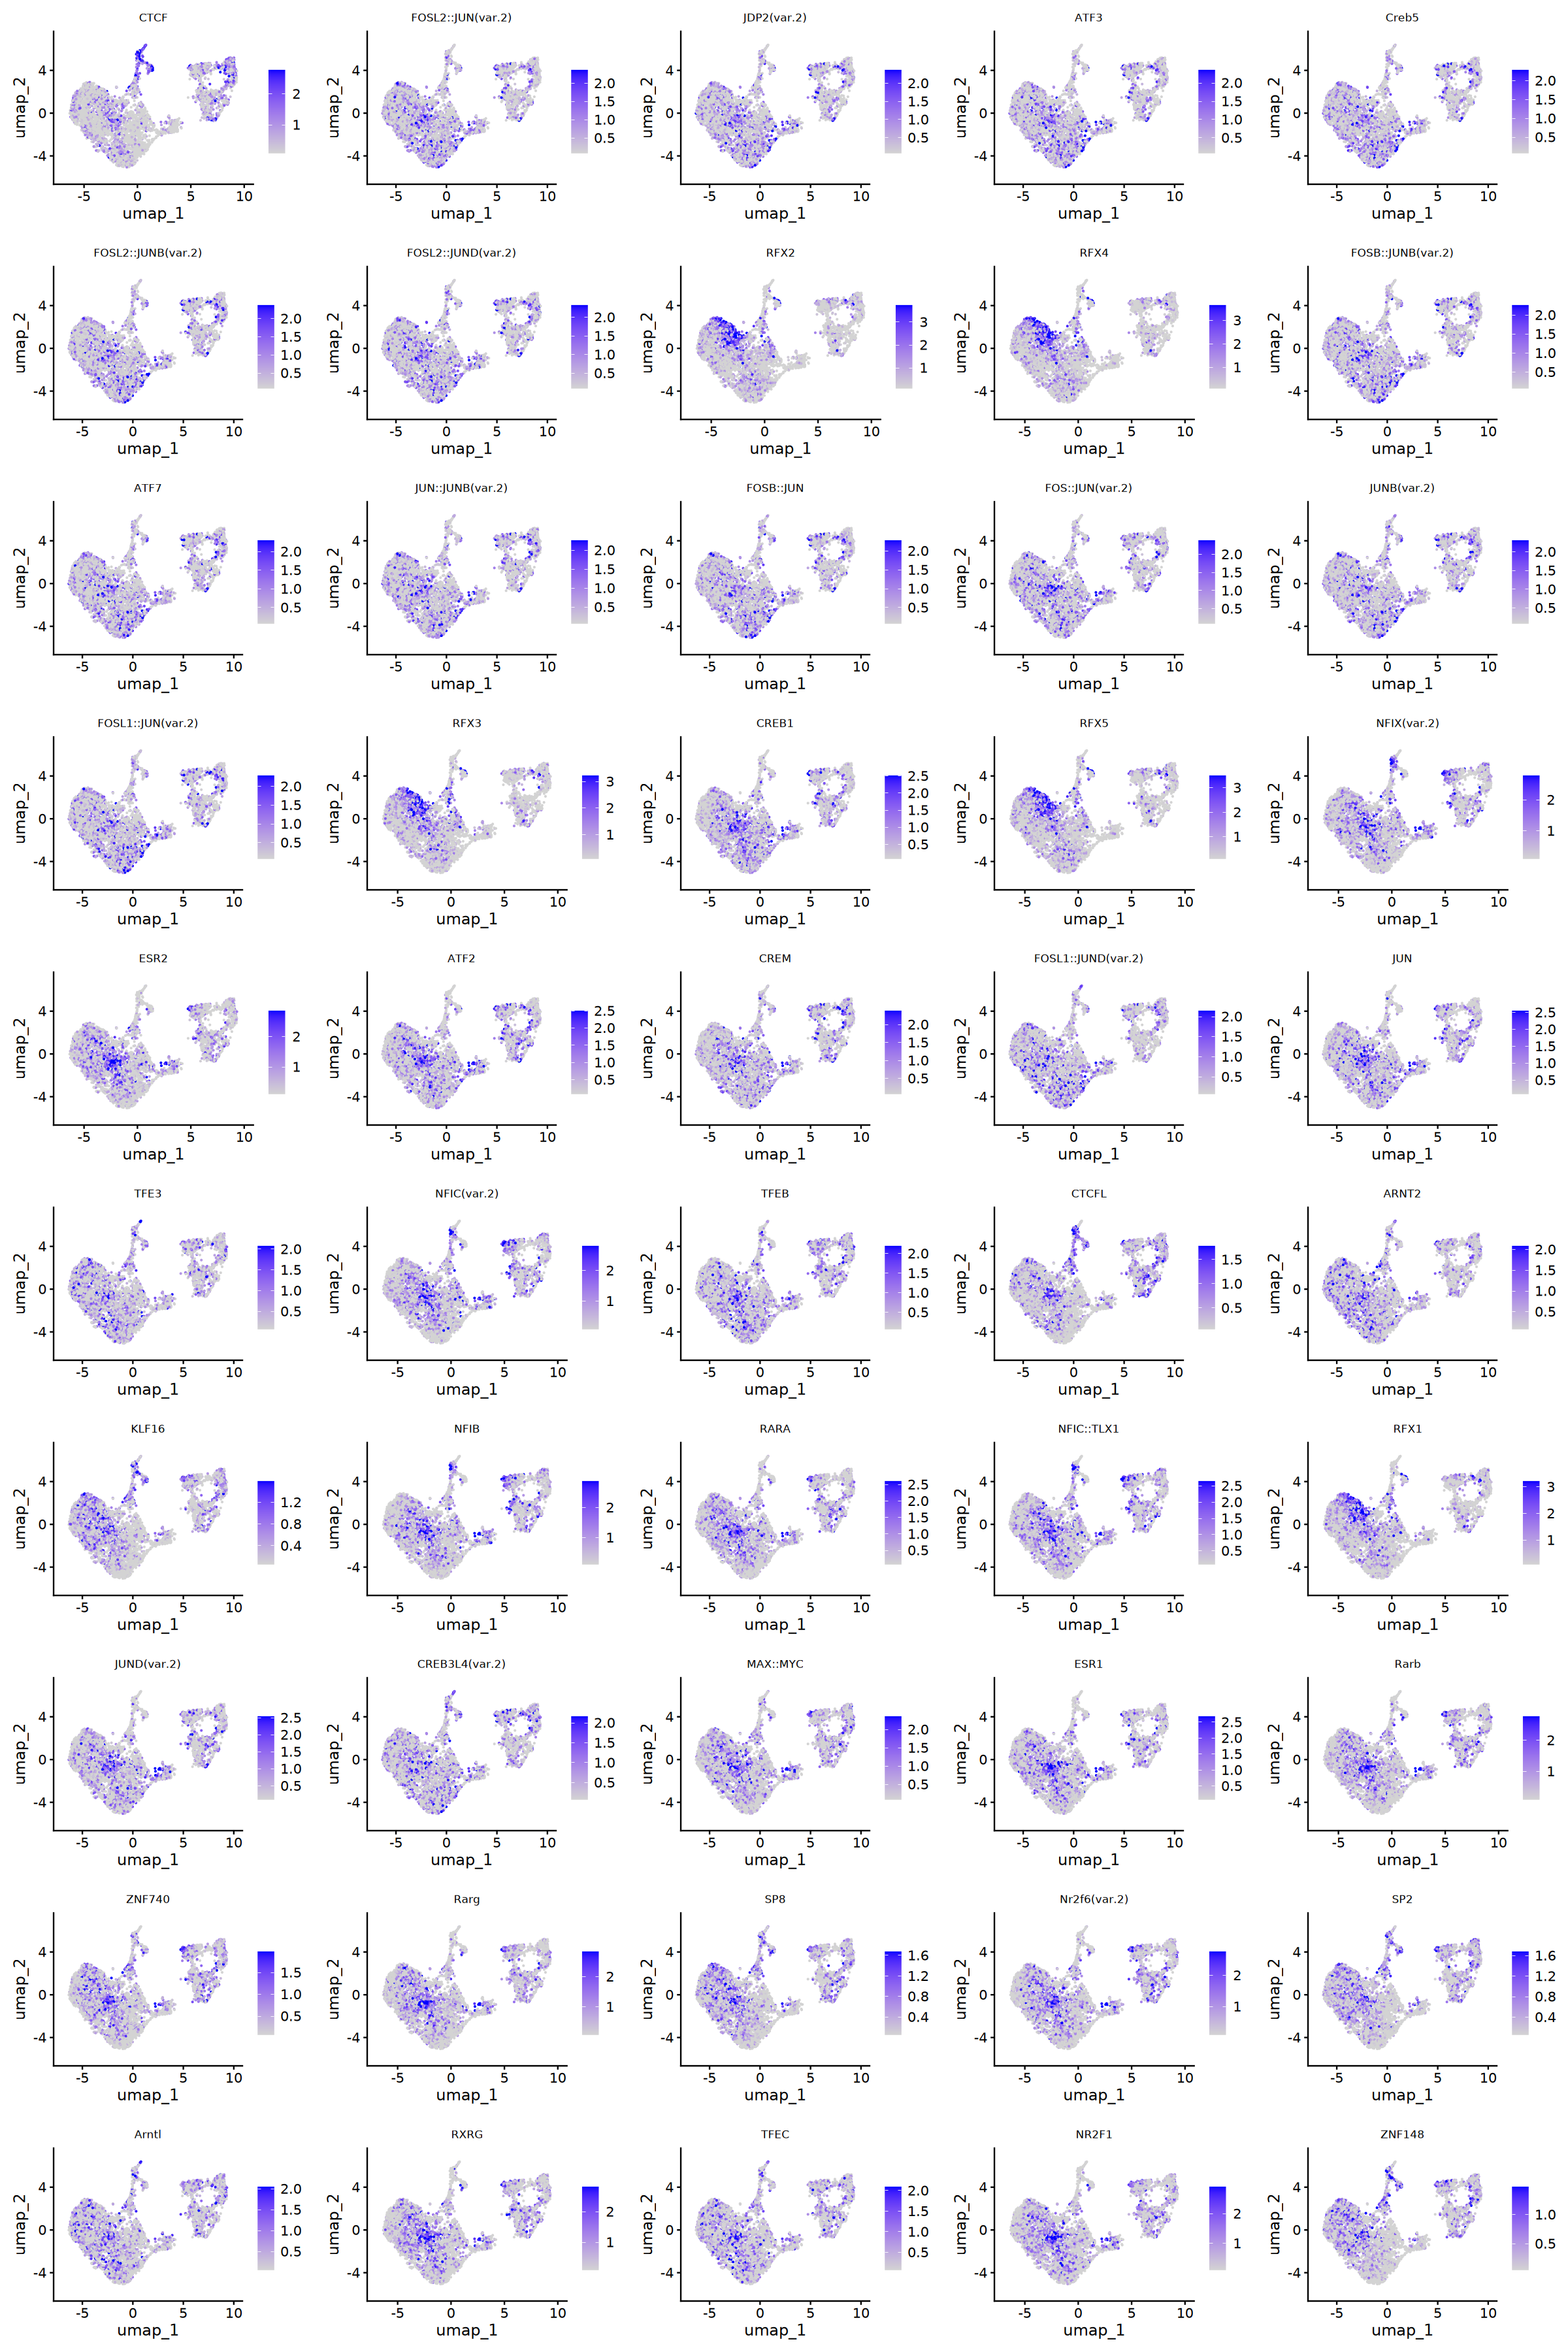

In [77]:
# Set default assay
DefaultAssay(E_V.merged.atac.obj) <- 'chromvar'

# Get the top 50 motifs
top_motifs <- head(rownames(differential.activity), n = 50)

# Convert motif IDs for readability
converted_motifs <- ConvertMotifID(E_V.merged.atac.obj[['ATAC']], id = c(top_motifs))

# Set plot dimensions
options(repr.plot.width = 20, repr.plot.height = 30)

# Create a list to store the plots
plot_list <- list()

# Loop through each motif and create a FeaturePlot, then rename the plot title
for (i in seq_along(top_motifs)) {
  motif <- top_motifs[i]
  readable_motif <- converted_motifs[i]
  
  # Create the FeaturePlot
  plot <- FeaturePlot(
    object = E_V.merged.atac.obj,
    features = motif,
    min.cutoff = 'q5',
    max.cutoff = 'q95',
    pt.size = 0.1
  )
  
  # Rename the plot title
  plot <- plot + ggtitle(readable_motif) + theme(plot.title = element_text(size = 10))
  
  # Add the plot to the list
  plot_list[[motif]] <- plot
}

# Arrange the plots in a grid with 5 columns
final_plot <- plot_grid(plotlist = plot_list, ncol = 5)

# Print the final plot
print(final_plot)


In [93]:
unique(E_V.merged.atac.obj$predicted.id)

[1] "L6 IT_2"           "L6 CT_Cpa6"        "L2/3/5 IT"        
[4] "L6 IT_1"           "IN Lamp5/Lhx6"     "Migrating neurons"
[7] "Astro_Aqp4"        "OPC_Pdgfra"        "Astro_Top2a"

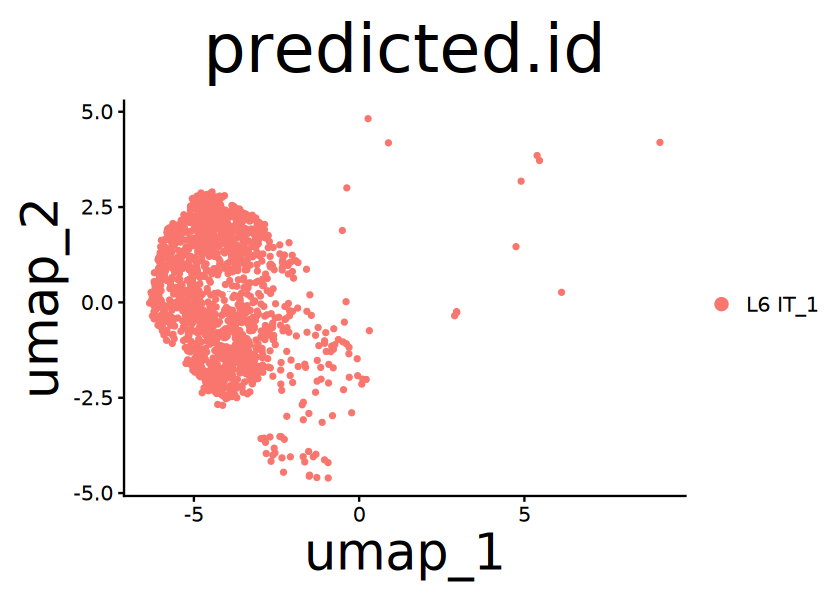

In [94]:
options(repr.plot.width=7, repr.plot.height=5)

Idents(E_V.merged.atac.obj) <- 'predicted.id'
DimPlot(subset(x = E_V.merged.atac.obj, idents = c('L6 IT_1')), shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

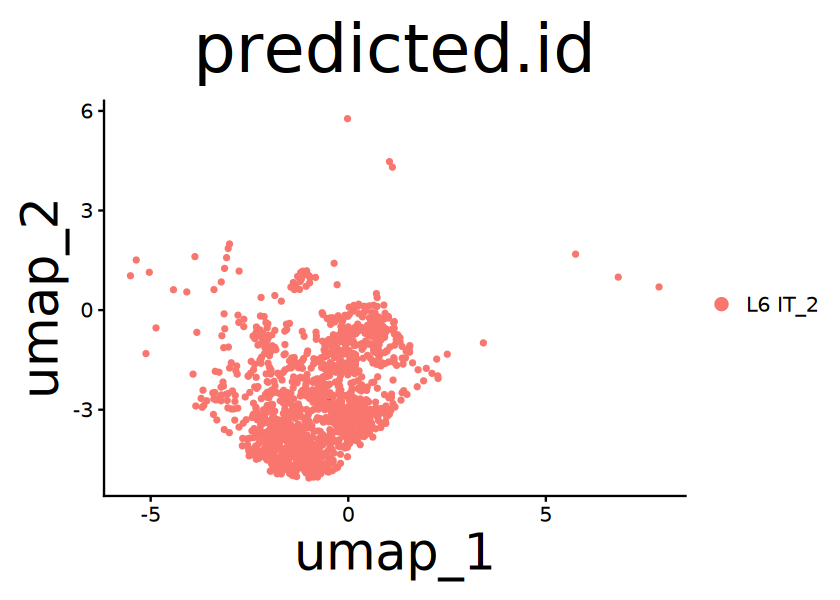

In [95]:
options(repr.plot.width=7, repr.plot.height=5)

Idents(E_V.merged.atac.obj) <- 'predicted.id'
DimPlot(subset(x = E_V.merged.atac.obj, idents = c('L6 IT_2')), shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

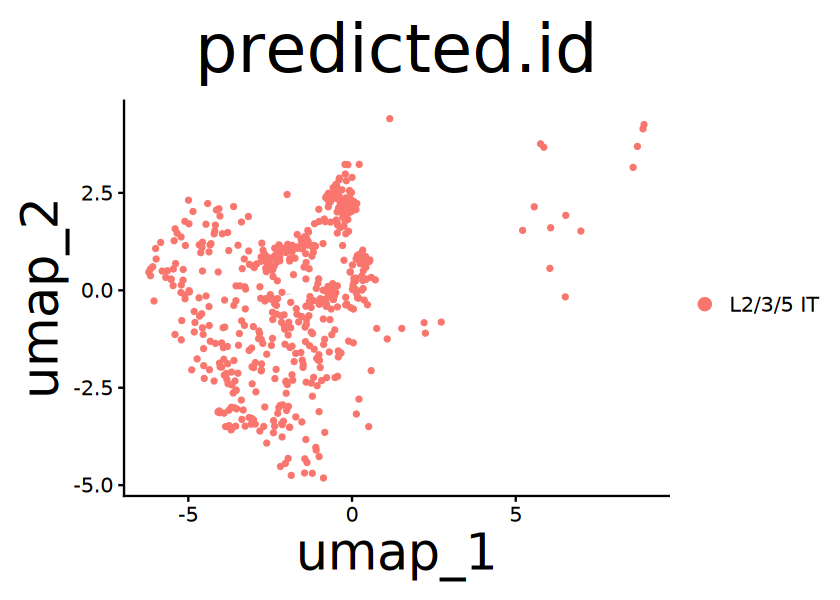

In [96]:
options(repr.plot.width=7, repr.plot.height=5)

Idents(E_V.merged.atac.obj) <- 'predicted.id'
DimPlot(subset(x = E_V.merged.atac.obj, idents = c('L2/3/5 IT')), shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

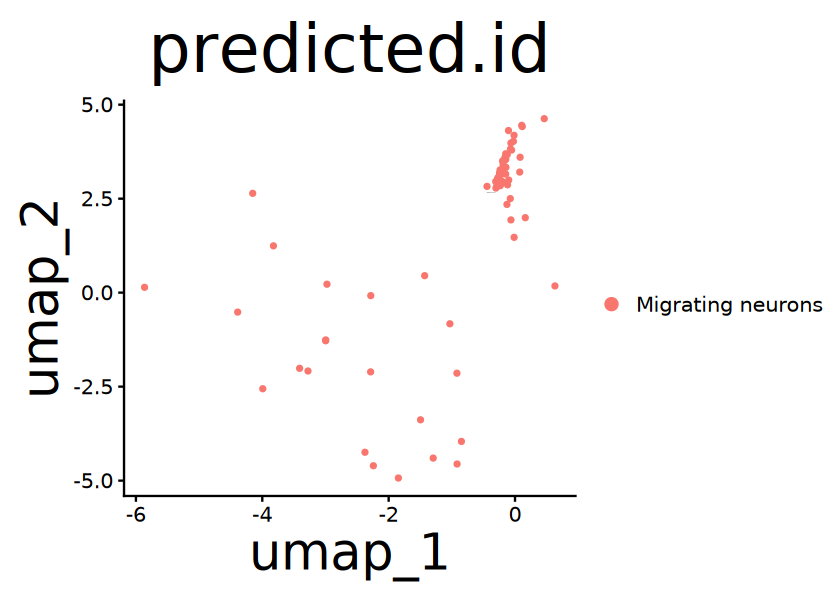

In [97]:
options(repr.plot.width=7, repr.plot.height=5)

Idents(E_V.merged.atac.obj) <- 'predicted.id'
DimPlot(subset(x = E_V.merged.atac.obj, idents = c('Migrating neurons')), shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

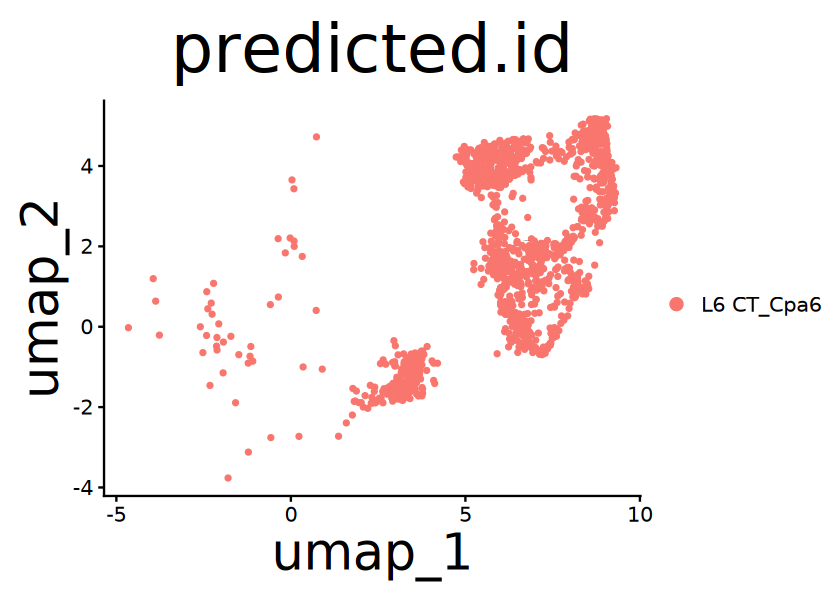

In [92]:
options(repr.plot.width=7, repr.plot.height=5)

Idents(E_V.merged.atac.obj) <- 'predicted.id'
DimPlot(subset(x = E_V.merged.atac.obj, idents = c('L6 CT_Cpa6')), shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

# END